# <img src="https://img.icons8.com/bubbles/50/000000/mind-map.png" style="height:50px;display:inline"> ECE 046211 - Technion - Deep Learning
---

## HW3 - Sequential Tasks and Training Methods
---

### <img src="https://img.icons8.com/clouds/96/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Students Information
---
* Fill in

|Name     |Campus Email| ID  |
|---------|--------------------------------|----------|
|Student 1| student_1@campus.technion.ac.il| 123456789|
|Student 2| student_2@campus.technion.ac.il| 987654321|


### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* Maximal garde: 100.
* Submission only in **pairs**. 
    * Please make sure you have registered your group in Moodle (there is a group creation component on the Moodle where you need to create your group and assign members).
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* <a style='color:red'> SAVE THE NOTEBOOKS WITH THE OUTPUT, CODE CELLS THAT WERE NOT RUN WILL NOT GET ANY POINTS! </a>
* What you have to submit:
    * If you have answered the questions in the notebook, you should submit this file only, with the name: `ece046211_hw3_id1_id2.ipynb`.
    * If you answered the questionss in a different file you should submit a `.zip` file with the name `ece046211_hw3_id1_id2.zip` with content:
        * `ece046211_hw3_id1_id2.ipynb` - the code tasks
        * `ece046211_hw3_id1_id2.pdf` - answers to questions.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Latex in Colab** - in some cases, Latex equations may no be rendered. To avoid this, make sure to not use *bullets* in your answers ("* some text here with Latex equations" -> "some text here with Latex equations").

### <img src="https://img.icons8.com/dusk/64/000000/online.png" style="height:50px;display:inline"> Working Online and Locally
---
* You can choose your working environment:
    1. `Jupyter Notebook`, **locally** with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or **online** on <a href="https://colab.research.google.com/">Google Colab</a>
        * Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    2. Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both allow editing and running Jupyter Notebooks.

* Please refer to `Setting Up the Working Environment.pdf` on the Moodle or our GitHub (https://github.com/taldatech/ee046211-deep-learning) to help you get everything installed.
* If you need any technical assistance, please go to our Piazza forum (`hw3` folder) and describe your problem (preferably with images).

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Part 1 - Theory](#-Part-1---Theory)
    * [Q1 - Dropout](#-Question-1--Dropout)
    * [Q2 - Preventing Variance Explosion](#-Question-2--Preventing-Variance-Explosion)
    * [Q3 - Batch Normalization](#-Solution-4--Batch-Normalization)
* [Part 2 - Code Assignments - Sequence-to-Sequence with Transformers](#-Part-2---Code-Assignments)
    * [Task 1 - Task 1 - Loading and Observing the Data](#-Task-1----Loading-and-Observing-the-Data)
    * [Task 2 - Preparing the Data - Separating to Inputs and Targets](#-Task-2----Preparing-the--Data---Separating-to-Inputs-and-Targets)
    * [Task 3 - Define Hyperparameters and Initialize the Model](#-Task-3----Define-Hyperparameters-and-Initialize-the-Model)
    * [Task 4 - Train and Evaluate the Language Model](#-Task-4----Train-and-Evaluate-the-Language-Model)
    * [Task 5 - Generate Sentences](#-Task-5----Generate-Sentences)
* [Credits](#-Credits)

### <img src="https://img.icons8.com/cute-clipart/64/000000/ball-point-pen.png" style="height:50px;display:inline"> Part 1 - Theory
---
* You can choose whether to answser these straight in the notebook (Markdown + Latex) or use another editor (Word, LyX, Latex, Overleaf...) and submit an additional PDF file, **but no handwritten submissions**.
* You can attach additional figures (drawings, graphs,...) in a separate PDF file, just make sure to refer to them in your answers.

* $\large\LaTeX$ <a href="https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index">Cheat-Sheet</a> (to write equations)
    * <a href="http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf">Another Cheat-Sheet</a>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 1 -Dropout
---
In this question, we are going to analyze the following idea:

**Idea: use Droput regularization as a feature selection mechanism for the input.**

To implement the idea, we wish to create a Dropout mask with probability $p_i$ to drop (=zero out) the $i^{th}$ component of the input feature vector, and optimize $p_i$ such that it encourages a deterministic selction of features (i.e., $p_i \to 0 \text{ or } 1$).

We will analyze the method on the simple case of Linear Regression: $$ \mathcal{L}(w)=\frac{1}{2}\sum_{n=1}^N\left(y^{(n)} -w^TD^{(n)}x^{(n)} \right)^2, $$ where $w \in \mathbb{R}^d$ is the parameters vector, $x^{(n)}\in \mathbb{R}^d$ are the trainin set samples, $y^{(n)} \in \mathbb{R}$ are the corresponding labels and $D^{(n)}\in \{0, 1 \}^{d \times d}$ is the *diagonal* random Dropout mask, where each element is sampled independently according to: 
$$ D_{ii}^{(n)}=\frac{1}{1-p_i}\begin{cases} 1 \text{ w.p. } 1-p_i \\ 0 \text{ w.p. } p_i \end{cases} ,$$
where $p_i \in [0,1]$ is the probability to drop (=zero out) the $i^{th}$ component in the input vector, and we denote $p=[p_1, ..., p_d]^T$.

1. Find $\mathbb{E}[D_{ii}^{(n)}]$ and show that $\mathbb{E}[D_{ii}^{(n)}D_{jj}^{(n)}]=1 + \delta_{ij}\frac{p_i}{1-p_i}$.

2. Show that the mean cost function $\bar{\mathcal{L}}(w,p)$ (the mean is over the *masks*) is $$ \bar{\mathcal{L}}(w,p) = \mathbb{E}[\mathcal{L}] =\frac{1}{2}\sum_{n=1}^N \left(y^{(n)} - w^Tx^{(n)} \right)^2 + \frac{1}{2}\sum_{i=1}^d \frac{p_i}{1-p_i}c_iw_i^2, $$ where $c_i = \sum_{n=1}^N \left(x_i^{(n)} \right)^2$. From this section onwards, you can always assume $\forall i : c_i >0$.

3. Briefly explain what is the difference between $\bar{\mathcal{L}}(w,p)$ and the standard Linear Regression loss function without Dropout.

4. Note that $\bar{\mathcal{L}}(w,p)$ is dependent on $p$, but we know that $p_i \in [0,1]$. Suggest a function $p=f(u)$ such that we can use Gradient Descent without cinstraints on $\bar{\mathcal{L}}(w,f(u))$.

5. Recall that we want $p_i \to 1$ for some features and for the rest $p_i \to 0$. Assume that there exists a *sparse* solution $w_0$ (that includes zeros), and a *dense* (non-sparse) solution $w_*$ such that $$ \forall n : y^{(n)} = w_0^Tx^{(n)}=w_*^Tx^{(n)}.$$ Does that necessarily mean that we get $w_0$ by reaching the minimum of $\bar{\mathcal{L}}(w,p)$ at $w,p$?

6. After some experiments, we got an improvement by adding noise to the input and regularization on $p$, and got $$ \bar{\mathcal{L}}(w,p) = \mathbb{E}[\mathcal{L}] =\frac{1}{2}\sum_{n=1}^N \left(y^{(n)} - w^Tx^{(n)} \right)^2 + \frac{1}{2}\sum_{i=1}^d \frac{1}{1-p_i}w_i^2\sum_{n=1}^N\left(x_i^{(n)}\right)^2 + \mu\sum_{i=1}^d(1-p_i). $$ Show by calculating $\bar{\mathcal{L}}(w)=\min_{p\in \mathbb{R}^d}\bar{\mathcal{L}}(w,p)$ that we can omit the Dropout and instead add a regularization $R(w)$ directly to the Linear Regression. Calculate the regularization $R(w)$ and explain how it helps in feature selection.

Question 2 - Answer
--
### Sub Section 1:
We'll use the definiton of $ D_{ii}^{(n)} $ to calculate the expectation:
$$ \mathbb{E}[D_{ii}^{(n)}] = (1-p_i)\cdot\frac{1}{1-p_i} + 0\cdot\frac{1}{1-p_i} = 1ֿ$$

For $ \mathbb{E}[D_{ii}^{(n)}D_{jj}^{(n)}] $ Let's consider the two different possibilities:
* $ i \neq j  \Rightarrow D_{ii}$ is independent of  $ D_{jj} $:
$$ \mathbb{E}[D_{ii}^{(n)}D_{jj}^{(n)}] = \mathbb{E}[D_{ii}^{(n)}]\cdot\mathbb{E}[D_{jj}^{(n)}] = 1 $$
* $ i = j $:
$$ \mathbb{E}[(D_{ii}^{(n)})^2] = (1-p_i)\cdot\frac{1}{(1-p_i)^2} + 0\cdot \frac{1}{(1-p_i)^2} = \frac{1}{1-p_i}$$

And when considering both cases the following applies:
$$ \mathbb{E}[D_{ii}^{(n)}D_{jj}^{(n)}] = 1 + \delta_{ij}\frac{p_i}{1-p_i} $$

### Sub Section 2:

$$ \bar{\mathcal{L}}(w,p) = \mathbb{E}[\mathcal{L}] = \mathbb{E}[\frac{1}{2} \sum_{n=1}^N \left(y^{(n)} - w^TD^{(n)}x^{(n)} \right)^2] = \frac{1}{2}\sum_{n=1}^N \mathbb{E}[((y^{(n)})^2 - 2w^TD^{(n)}x^{(n)}y^{(n)} + w^TD^{(n)}x^{(n)}w^TD^{(n)}x^{(n)})]$$

At this point we will use the fact that the mean is over the masks and the results of sub-section 1:

$$ \frac{1}{2}\sum_{n=1}^N \mathbb{E}[((y^{(n)})^2 - 2w^TD^{(n)}x^{(n)}y^{(n)} + w^TD^{(n)}x^{(n)}w^TD^{(n)}x^{(n)})] = \frac{1}{2}\sum_{n=1}^N ((y^{(n)})^2 - 2w^Tx^{(n)}y^{(n)} + \mathbb{E}[w^TD^{(n)}x^{(n)}w^TD^{(n)}x^{(n)}])$$

Since $ w^TD^{(n)}x^{(n)} $ is a scalar then $ (w^TD^{(n)}x^{(n)})^T = w^TD^{(n)}x^{(n)} $:
$$ \frac{1}{2}\sum_{n=1}^N ((y^{(n)})^2 - 2w^Tx^{(n)}y^{(n)} + \mathbb{E}[w^TD^{(n)}x^{(n)}w^TD^{(n)}x^{(n)}]) = \frac{1}{2}\sum_{n=1}^N ((y^{(n)})^2 - 2w^Tx^{(n)}y^{(n)} + \mathbb{E}[w^TD^{(n)}x^{(n)}(x^{(n)})^TD^{(n)}w]) = \frac{1}{2}\sum_{n=1}^N ((y^{(n)})^2 - 2w^Tx^{(n)}y^{(n)} + w^T\mathbb{E}[D^{(n)}x^{(n)}(x^{(n)})^TD^{(n)}]w)$$

Now we will examine closely the expression $ w^T\mathbb{E}[D^{(n)}x^{(n)}(x^{(n)})^TD^{(n)}]w $:

$$ x^{(n)}(x^{(n)})^T = \begin{pmatrix} (x_1^{(n)})^2 & x_1^{(n)}x_2^{(n)} & x_1^{(n)}x_3^{(n)} & ... & x_1^{(n)}x_d^{(n)} \\ x_2^{(n)}x_1^{(n)} & (x_2^{(n)})^2 & x_2^{(n)}x_3^{(n)} & ... & x_2^{(n)}x_d^{(n)} \\ . & & & & . \\ . & & & & . \\ . & & & & . \\ x_d^{(n)}x_1^{(n)} & x_d^{(n)}x_2^{(n)} & x_d^{(n)}x_3^{(n)} & ... & (x_d^{(n)})^2 \end{pmatrix} $$

$$ D^{(n)}x^{(n)}(x^{(n)})^T = \begin{pmatrix} D_{11}^{(n)}(x_1^{(n)})^2 & D_{11}^{(n)}x_1^{(n)}x_2^{(n)} & D_{11}^{(n)}x_1^{(n)}x_3^{(n)} & ... & D_{11}^{(n)}x_1^{(n)}x_d^{(n)} \\ D_{22}^{(n)}x_2^{(n)}x_1^{(n)} & D_{22}^{(n)}(x_2^{(n)})^2 & D_{22}^{(n)}x_2^{(n)}x_3^{(n)} & ... & D_{22}^{(n)}x_2^{(n)}x_d^{(n)} \\ . & & & & . \\ . & & & & . \\ . & & & & . \\ D_{dd}^{(n)}x_d^{(n)}x_1^{(n)} & D_{dd}^{(n)}x_d^{(n)}x_2^{(n)} & D_{dd}^{(n)}x_d^{(n)}x_3^{(n)} & ... & D_{dd}^{(n)}(x_d^{(n)})^2 \end{pmatrix} $$

$$ D^{(n)}x^{(n)}(x^{(n)})^TD^{(n)} = \begin{pmatrix} (D_{11}^{(n)})^2(x_1^{(n)})^2 & D_{22}^{(n)}D_{11}^{(n)}x_1^{(n)}x_2^{(n)} & D_{33}^{(n)}D_{11}^{(n)}x_1^{(n)}x_3^{(n)} & ... & D_{dd}^{(n)}D_{11}^{(n)}x_1^{(n)}x_d^{(n)} \\ D_{11}^{(n)}D_{22}^{(n)}x_2^{(n)}x_1^{(n)} & (D_{22}^{(n)})^2(x_2^{(n)})^2 & D_{33}^{(n)}D_{22}^{(n)}x_2^{(n)}x_3^{(n)} & ... & D_{dd}^{(n)}D_{22}^{(n)}x_2^{(n)}x_d^{(n)} \\ . & & & & . \\ . & & & & . \\ . & & & & . \\ D_{11}^{(n)}D_{dd}^{(n)}x_d^{(n)}x_1^{(n)} & D_{22}^{(n)}D_{dd}^{(n)}x_d^{(n)}x_2^{(n)} & D_{33}^{(n)}D_{dd}^{(n)}x_d^{(n)}x_3^{(n)} & ... & (D_{dd}^{(n)})^2(x_d^{(n)})^2 \end{pmatrix} $$

So in conclusion we get $ [D^{(n)}x^{(n)}(x^{(n)})^TD^{(n)}]_{ij} = D_{ii}^{(n)}D_{jj}^{(n)}x_i^{(n)}x_j^{(n)} $ Now we can calculate based on sub section 1 results:

$$ \mathbb{E}[[D^{(n)}x^{(n)}(x^{(n)})^TD^{(n)}]_{ij}] = \mathbb{E}[D_{ii}^{(n)}D_{jj}^{(n)}]x_i^{(n)}x_j^{(n)} = x_i^{(n)}x_j^{(n)} + \delta_{ij}\frac{p_i}{1-p_i}x_i^{(n)}x_j^{(n)} $$

This means that:
$$ \mathbb{E}[D^{(n)}x^{(n)}(x^{(n)})^TD^{(n)}] = x^{(n)}(x^{(n)})^T + \begin{pmatrix} \frac{p_1}{1-p_1}(x_1^{(n)})^2 & 0 & 0 & ... & 0 \\ 0 & \frac{p_2}{1-p_2}(x_2^{(n)})^2 & 0 & ... & 0 \\ 0 & 0 & \frac{p_3}{1-p_3}(x_3^{(n)})^2 & ... & 0 \\ . & & & & . \\ . & & & & . \\ . & & & & . \\ 0 & 0 & 0 &  ... & \frac{p_d}{1-p_d}(x_d^{(n)})^2 \end{pmatrix} $$

Let's notate:
$$ B^{(n)} = \begin{pmatrix} \frac{p_1}{1-p_1}(x_1^{(n)})^2 & 0 & 0 & ... & 0 \\ 0 & \frac{p_2}{1-p_2}(x_2^{(n)})^2 & 0 & ... & 0 \\ 0 & 0 & \frac{p_3}{1-p_3}(x_3^{(n)})^2 & ... & 0 \\ . & & & & . \\ . & & & & . \\ . & & & & . \\ 0 & 0 & 0 &  ... & \frac{p_d}{1-p_d}(x_d^{(n)})^2 \end{pmatrix} $$

Using this notation we will caclulate the loss:

$$ \frac{1}{2}\sum_{n=1}^N ((y^{(n)})^2 - 2w^Tx^{(n)}y^{(n)} + w^T\mathbb{E}[D^{(n)}x^{(n)}(x^{(n)})^TD^{(n)}]w) = \frac{1}{2}\sum_{n=1}^N ((y^{(n)})^2 - 2w^Tx^{(n)}y^{(n)} + w^T(x^{(n)}(x^{(n)})^T + B^{(n)})w) = $$ $$ = \frac{1}{2}\sum_{n=1}^N ((y^{(n)})^2 - 2w^Tx^{(n)}y^{(n)} + w^Tx^{(n)}(x^{(n)})^Tw + w^TB^{(n)}w) = \frac{1}{2}\sum_{n=1}^N ((y^{(n)} - w^Tx^{(n)})^2 + w^TB^{(n)}w) = $$ $$ = \frac{1}{2}\sum_{n=1}^N (y^{(n)} - w^Tx^{(n)})^2 + \frac{1}{2}\sum_{n=1}^N w^TB^{(n)}w $$

Now let's examine $ \frac{1}{2}\sum_{n=1}^N w^TB^{(n)}w $:
$$ \frac{1}{2}\sum_{n=1}^N w^TB^{(n)}w = \frac{1}{2}\sum_{n=1}^N \sum_{i=1}^d \frac{p_i}{1-p_i}(x_i^{(n)})^2w_i^2 = $$ $$ = \frac{1}{2}\sum_{i=1}^d \frac{p_i}{1-p_i}\sum_{n=1}^N((x_i^{(n)})^2)w_i^2 = \frac{1}{2}\sum_{i=1}^d \frac{p_i}{1-p_i}c_iw_i^2$$

So lastly we achieve:

$$ \bar{\mathcal{L}}(w,p) = \frac{1}{2}\sum_{n=1}^N (y^{(n)} - w^Tx^{(n)})^2 + \frac{1}{2}\sum_{n=1}^N w^TB^{(n)}w = \frac{1}{2}\sum_{n=1}^N (y^{(n)} - w^Tx^{(n)})^2 + \frac{1}{2}\sum_{i=1}^d \frac{p_i}{1-p_i}c_iw_i^2 $$
$$ \blacksquare $$

### Sub Section 3

When using $ \bar{\mathcal{L}}(w,p) $, when we will perform the optimization we will try to minimize $ \frac{1}{2}\sum_{i=1}^d \frac{p_i}{1-p_i}c_iw_i^2 $ added to the regular linear regression risk, since the minimization is over $ w $ and $ p $ and if $ p_i \rightarrow 1 $ then the term explodes to infinity so this will encourage the minimization to set  $ w_i = 0 $ in order to achieve the minimum and if $ p_i \rightarrow 0 $ the term will have no effect. So in conclusion the features which effect the least over the regular linear regression term will achieve high $ p_i $ and in parallel a very low $ w_i $ effectively ignoring them since the weights will be zeroed out. So this term will encourage ignoring features that are least correlated to the prediction, achieving the dropout effect.

### Sub Section 4

We can select the Logistic Regression function notated $ f(u_i) $ since it's consistent with the constraint $ f(u_i) \in [0,1] $ so we will set $ \forall \;\; i \in \{1,..,d\} \;\;, p_i = f(u_i) = \frac{1}{1+e^{-u_i}} $ And accordingly we will get $ p = f(u) $

### Sub Section 5
No it doesn't necessarily mean that we will converge to the $ w_0 $ solution since it depends on the initilization of $ p_i $ and $ w_i $.
Let's assume we initialize $ \forall i \in[1,...,d] \;\;\; p_i=0 $ With this initialization $ \bar{\mathcal{L}}(w,p) $ is reduced to:

$$ \bar{\mathcal{L}}(w,p) = \frac{1}{2}\sum_{n=1}^N (y^{(n)} - w^Tx^{(n)})^2 $$

And for this expression both $ w_0 $ and $ w_* $ achieve minimum loss so both are likely to be converged to while minimizing the loss.

So even in the very particular case of initializing $ \forall i \in[1,...,d] \;\;\; p_i=0 $ and $ w = w_* $ we will get $ \bar{\mathcal{L}}(w,p) = 0 $ so we already converged to the minimum loss and we will get no improvement over time.
This example shows that we won't necessarily converge to $ w_0 $ and this depends on the initialization of the parameters.

### Sub Section 6

Let's derive the risk by $ p_i $:

$$ \frac{\partial\bar{\mathcal{L}}(w,p)}{\partial p_i} = \frac{\partial \frac{1}{2}\sum_{i=1}^d \frac{1}{1-p_i}w_i^2\sum_{n=1}^N\left(x_i^{(n)}\right)^2 + \mu\sum_{i=1}^d(1-p_i)}{\partial p_i} = \frac{1}{(1-p_i)^2}w_i^2\sum_{n=1}^N\left(x_i^{(n)}\right)^2 - \mu = 0 \Rightarrow$$
$$ \mu(1-p_i)^2 = w_i^2\sum_{n=1}^N\left(x_i^{(n)}\right)^2 \Rightarrow 1-p_i = \frac{|w_i|\sqrt{\sum_{n=1}^N\left(x_i^{(n)}\right)^2}}{\sqrt{\mu}} $$

Now let's use this result to express $ \bar{\mathcal{L}}(w,p) $ as $ \bar{\mathcal{L}}(w) $:

$$ \mathbb{E}[\mathcal{L}] =\frac{1}{2}\sum_{n=1}^N \left(y^{(n)} - w^Tx^{(n)} \right)^2 + \frac{1}{2}\sum_{i=1}^d \frac{1}{1-p_i}w_i^2\sum_{n=1}^N\left(x_i^{(n)}\right)^2 + \mu\sum_{i=1}^d(1-p_i) = $$
$$ = \frac{1}{2}\sum_{n=1}^N \left(y^{(n)} - w^Tx^{(n)} \right)^2 + \frac{1}{2}\sum_{n=1}^N \left(y^{(n)} - w^Tx^{(n)} \right)^2 + \frac{1}{2}\sum_{i=1}^d \frac{\sqrt{\mu}}{|w_i|\sqrt{\sum_{n=1}^N\left(x_i^{(n)}\right)^2}}w_i^2\sum_{n=1}^N\left(x_i^{(n)}\right)^2 + \mu\sum_{i=1}^d \frac{|w_i|\sqrt{\sum_{n=1}^N\left(x_i^{(n)}\right)^2}}{\sqrt{\mu}} = $$
$$ =\frac{1}{2}\sum_{n=1}^N \left(y^{(n)} - w^Tx^{(n)} \right)^2 + \frac{\sqrt{\mu}}{2} \sum_{i=1}^d |w_i| \sqrt{\sum_{n=1}^N\left(x_i^{(n)}\right)^2} + \sqrt{\mu} \sum_{i=1}^d |w_i| \sqrt{\sum_{n=1}^N\left(x_i^{(n)}\right)^2} = $$ $$ = \frac{1}{2}\sum_{n=1}^N \left(y^{(n)} - w^Tx^{(n)} \right)^2 +  \frac{3\sqrt{\mu}}{2} \sum_{i=1}^d |w_i| \sqrt{\sum_{n=1}^N\left(x_i^{(n)}\right)^2} = \frac{1}{2}\sum_{n=1}^N \left(y^{(n)} - w^Tx^{(n)} \right)^2 + \lambda \sum_{i=1}^d |w_i| \sqrt{\sum_{n=1}^N\left(x_i^{(n)}\right)^2}$$

So finally we get:

$$ \bar{\mathcal{L}}(w) = \frac{1}{2}\sum_{n=1}^N \left(y^{(n)} - w^Tx^{(n)} \right)^2 + \lambda \sum_{i=1}^d |w_i| \sqrt{\sum_{n=1}^N\left(x_i^{(n)}\right)^2} $$

And:

$$ R(w) = \lambda \sum_{i=1}^d |w_i| \sqrt{\sum_{n=1}^N\left(x_i^{(n)}\right)^2} $$

This regularization helps with feature selection as it inspires to minimize $ R(w) $ and this can be achieved only by reducing $ |w_i| $ intuitively this effect will only occur for the features that participate the least in minimizing the linear regression expression, so if there is a redundant feature that we can predict without we cant anticipate that under optimal conditions we will set it's $ w_i = 0 $ to achieve $ R(w_i) = 0 $ and this is encouraging the minimization to set $ w_i \neq 0 $ to the lowest number of features possible $ \Rightarrow $ feature selection.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 2 - Preventing Variance Explosion
---
This question relates to lectures 8-9 (from slide 7):

Find an initializtion scheme such that $$ \forall l, i,: \text{(1) } \mathbb{E}\left[F_l(u_l)|u_l\right]=0, \text{ (2) } Var(u_l[i]) = 1, $$ assuming skip connections: $u_{l+1} = u_l + F_l(u_l)$ with a single skip $F_l(u_l)=W_l\phi(u_l)+b_l$ and the activation is ReLU: $\phi(x) = \text{ReLU}(x) = \max(0,x)$.

Question 2 - answer
--

### Sub Section 1:

lets evaluate the expression  $\mathbb{E}\left[F_l(u_l)|u_l\right]$.

$ \mathbb{E}\left[F_l(u_l)|u_l\right]=\mathbb{E}\left[W_l\phi(u_l)+b_l|u_l\right]=\mathbb{E}\left[W_l\cdot\text{max}(0,u_l)|u_l\right]+\mathbb{E}\left[b_l|u_l\right]$

finally we would like that $∀u_l$:

$\text{max}(0,u_l)\mathbb{E}\left[W_l|u_l\right]+\mathbb{E}\left[b_l|u_l\right]=0$

that would happen for example if:

$\mathbb{E}\left[W_l|u_l\right]=\mathbb{E}\left[W_l\right]=0,\mathbb{E}\left[b_l|u_l\right]=\mathbb{E}\left[b_l\right]=0$

### Sub Section 2:

let's evaluate $Var(u_l[i])$.

from the law of total variance we get that:

$Var(u_l[i])=\mathbb{E}\left[Var(u_{l}[i]|u_{l-1}[i])\right]+Var(\mathbb{E}\left[u_{l}[i]|u_{l-1}[i]\right])$

since $u_{l+1} = u_l + F_l(u_l)$,

we get that $u_{l} = u_{l-1} + F_{l-1}(u_{l-1})$

therefor:

$Var(u_l[i])=\mathbb{E}\left[Var(u_{l-1}[i] + F_{l-1}(u_{l-1}[i])|u_{l-1}[i])\right]+Var(\mathbb{E}\left[u_{l-1}[i] + F_{l-1}(u_{l-1}[i])|u_{l-1}[i]\right])$

from (1) and assuming (2) is happening for layers with index lower than l, we get that:

$Var(\mathbb{E}\left[u_{l-1}[i] + F_{l-1}(u_{l-1}[i])|u_{l-1}[i]\right])=Var(u_{l-1}[i]+0)=1$

to finish the proof we need to show that:

$\mathbb{E}\left[Var(u_{l-1}[i] + F_{l-1}(u_{l-1}[i])|u_{l-1}[i])\right]=0$

Variance is invariant with respect to scalar addition:

$\mathbb{E}\left[Var(u_{l-1}[i] + F_{l-1}(u_{l-1}[i])|u_{l-1}[i])\right]=\mathbb{E}\left[Var( F_{l-1}(u_{l-1}[i])|u_{l-1}[i])\right]=\mathbb{E}\left[Var( F_{l-1}(u_{l-1}[i])|u_{l-1}[i])\right]=\mathbb{E}\left[Var( W_{l-1}\phi(u_{l-1}[i])+b_{l-1}|u_{l-1}[i])\right]=\mathbb{E}\left[Var( W_{l-1}\phi(u_{l-1}[i])|u_{l-1}[i])\right]$

from $(1)$

$Var( W_{l-1}\phi(u_{l-1}[i])|u_{l-1}[i])=\mathbb{E}\left[ \phi(u_{l-1}[i])^TW_{l-1}^TW_{l-1}\phi(u_{l-1}[i])|u_{l-1}[i]\right]$

so we get:

$\mathbb{E}\left[Var( W_{l-1}\phi(u_{l-1}[i])|u_{l-1}[i])\right]=\mathbb{E}\left[\mathbb{E}\left[ \phi(u_{l-1}[i])^TW_{l-1}^TW_{l-1}\phi(u_{l-1}[i])|u_{l-1}[i]\right]\right]=
\mathbb{E}\left[\phi(u_{l-1}[i])^T\right]\mathbb{E}\left[ W_{l-1}^TW_{l-1}\right]\mathbb{E}\left[\phi(u_{l-1}[i])\right]$

for both (1) and (2) if we choose **W**=0 , **b**=0 as initializtion will work.

since we have skip connection this initializtion won't cause a problem to train the model.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 3 -Batch Normalization
---
This question relates to lectures 8-9 (from slide 9):

Prove that **without** regularization, BatchNorm **scale invariance** for parameters $\mathbf{w}$ implies:
1. $\nabla \mathcal{L}(\mathbf{w})^T\mathbf{w} = 0$
2. And under gradient flow dynamics ($\dot{\mathbf{w}} = -\eta \nabla \mathcal{L}(\mathbf{w})$) this implies (L2) norm conservation: $\forall t: ||\mathbf{w}(t)||^2 = C$

Hint: see results from the multilayer networks lecture.

Question 3 - Answer
--

### Sub Section 1:

in lecture 5 we saw that if MNN is invariant to $\psi_{\alpha}(w)$ then without
regularization ($\mu=0$) we get that:

$\nabla\mathcal{L}(\psi_{\alpha}(w))^T\frac{∂}{∂\alpha} \psi_{\alpha}(w) =0 $

in our case, $\psi_{\alpha}(w)→ BN(w)=BN(\alpha w)$
so we get:

$\nabla\mathcal{L}(\mathbf{w})^T\mathbf{w}= 0$

### Sub Section 2:

$\dot{\mathbf{w}} = -\eta \nabla \mathcal{L}(\mathbf{w}) →\nabla \mathcal{L}(\mathbf{w})=\frac{\dot{\mathbf{w}}}{-\eta}$

lets apply that in $(1)$ and we will get that:

$\dot{\mathbf{w}}^T\mathbf{w}= 0$

$\frac{1}{2}\cdot\frac{∂||\mathbf{w}(t)||^2}{∂t}=0→_*||\mathbf{w}(t)||^2=const$


### <img src="https://img.icons8.com/officel/80/000000/code.png" style="height:50px;display:inline"> Part 2 - Code Assignments
---
* You must write your code in this notebook and save it with the output of all of the code cells.
* Additional text can be added in Markdown cells.
* You can use any other IDE you like (PyCharm, VSCode...) to write/debug your code, but for the submission you must copy it to this notebook, run the code and save the notebook with the output.

In [1]:
# this part uses the Wikitext-2 dataset. To access torchtext datasets, please install `torchdata`:
# `pip install torchdata` ir `conda install -c pytorch torchdata` in activated environment 
# or `!pip install torchdata` on colab.
# !pip install torchdata
# notes:
# torch=2.0.0 <-> torchtext 0.15.1
# torch=1.13.0 <-> torchtext 0.14.0
# torch=1.12.1 <-> torchtext 0.13.1
# downgrading torchtext example: !pip install torchtext==0.13.1 --no-deps
# torchtext requires the `portalocker` package to download datasets:
# !pip install portalocker

In [2]:
# imports for the practice (you can add more if you need)
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import math
from typing import Tuple

# pytorch
import torch
from torch import nn, Tensor
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from torch.utils.data import dataset

# torchtext
import torchtext
from torchtext.datasets import WikiText2
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

NUM_OF_WORDS_TO_PRINT = 20

seed = 211
np.random.seed(seed)
torch.manual_seed(seed)

In [3]:
print(f'pytorch: {torch.__version__}, torchtext: {torchtext.__version__}')

pytorch: 2.0.1, torchtext: 0.15.2


## <img src="https://img.icons8.com/bubbles/50/000000/workflow.png" style="height:50px;display:inline">  Sequence-to-Sequence with Transformers
---
* In this exercise, you are going to build a language model using PyTroch's Transformer module.
* We will work with the **Wikitext-2** dataset: the WikiText language modeling dataset is a collection of over 100 million tokens extracted from the set of verified Good and Featured articles on Wikipedia.
* After training, you will be able to generate senetences!

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1  - Loading and Observing the Data
---
1. Run the following cells that define the functions `batchify` and `data_process` and initialize the tokenizer, vocabulary and the WikiText2 train dataset.
2. Create the train, valid and test data using the provided `batchify` function.
5. Print the shape of `train_data`, write in a comment the meaning of each dimension (e.g. `# [meaning of dim1, meaning of dim2]`).
6. Print the first 20 words of one training sample from `train_data`. Use the vocabulary you built to transfer between tokens to words: `itos = vocab.vocab.get_itos()` will give a "int to string" list.

In [4]:
def batchify(data, bsz):
    """Divides the data into bsz separate sequences, removing extra elements
    that wouldn't cleanly fit.

    Args:
        data: Tensor, shape [N]
        bsz: int, batch size

    Returns:
        Tensor of shape [N // bsz, bsz]
    """
    seq_len = data.size(0) // bsz
    data = data[:seq_len * bsz]
    data = data.view(bsz, seq_len).t().contiguous()
    return data.to(device)

In [5]:
def data_process(raw_text_iter: dataset.IterableDataset) -> Tensor:
    """Converts raw text into a flat Tensor."""
    data = [torch.tensor(vocab(tokenizer(item)), dtype=torch.long) for item in raw_text_iter]
    return torch.cat(tuple(filter(lambda t: t.numel() > 0, data)))

In [6]:
train_iter = WikiText2(split='train')
tokenizer = get_tokenizer('basic_english')
vocab = build_vocab_from_iterator(map(tokenizer, train_iter), specials=['<unk>'])
vocab.set_default_index(vocab['<unk>'])

In [7]:
# train_iter was "consumed" by the process of building the vocab,
# so we have to create it again
train_iter, val_iter, test_iter = WikiText2()
train_data = data_process(train_iter)
val_data = data_process(val_iter)
test_data = data_process(test_iter)

# FIXME - Using Apple GPU Here, Change to cuda so it will compile when submitting
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = "mps" if torch.has_mps else "cpu"
print(f"[INFO] Current training device: {device}")

[INFO] Current training device: mps


In [8]:
batch_size = 20
eval_batch_size = 10

In [9]:
train_data = batchify(train_data, batch_size)
val_data = batchify(val_data, eval_batch_size)
test_data = batchify(test_data, eval_batch_size)
print(train_data.shape)
# Dimension 1 is the sequence length for each batch
# Dimension 2 is the number of batches
itos = vocab.vocab.get_itos()
word_sample = ''
for i in range(NUM_OF_WORDS_TO_PRINT):
    word_code = train_data[i,5]
    word_sample += f'{itos[word_code]} '
print(word_sample)

torch.Size([102499, 20])
polygamist families , but janelle was not . although christine ' s mother left the faith she still supports them 


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2  - Preparing the  Data - Separating to Inputs and Targets
---
* For a language modeling task, the model needs the following words as `Target`.
    * For example, for the senetence "I have a nice dog", the model will be given "I have a nice" as input, and "have a nice dog" as the target.
* Implement (complete) the function `get_batch(source, i, bptt)`: it generates the input and target sequence for the transformer model. It subdivides the source data into chunks of length `bptt`.
    * For example, for `bptt=2` and at `i=0`, the output of `data, target = get_batch(train_data, i=0, bptt=2)`: `data` will be of shape (2, 20), where the batch size is 20 and `target` will be of length 40 (the target for each element is two words, but we flatten `target`).
    * Example: for `bptt=2`, and the ABCDEFG... characters as input, our batches will be in the form of: `data=[a, b], target=[b, c]`. For `bptt=3`: `data=[a, b, c], target=[b, c, d]` and so on. This one example is a batch.
    * Print a sample from `data` and `target`.

In [10]:
def get_batch(source, i, bptt):
    """
    Args:
        source: Tensor, shape [full_seq_len, batch_size]
        i: int
        bptt: int
    Returns:
        tuple (data, target), where data has shape [seq_len, batch_size] and
        target has shape [seq_len * batch_size]
    """
    seq_len = min(bptt, len(source) - 1 - i)
    data = source[i:i + seq_len]
    target = source[i+1:i+seq_len+1]
    target = target.flatten()
    return data, target

sample_bptt = 5
sample_batch = get_batch(train_data, 0, sample_bptt)
sample_data = ''
sample_target = ''
print(f'Using bptt = {sample_bptt} and batch size = {batch_size}')
print(f'Data Shape: {sample_batch[0].shape}')
print(f'Target Shape: {sample_batch[1].shape}')
for i in range(sample_bptt):
    sample_data_code = sample_batch[0][i,5]
    sample_target_code = sample_batch[1][5 + i * batch_size]
    sample_data += f'{itos[sample_data_code]} '
    sample_target += f'{itos[sample_target_code]} '
print(f'Data = {sample_data}')
print(f'Target = {sample_target}')

Using bptt = 5 and batch size = 20
Data Shape: torch.Size([5, 20])
Target Shape: torch.Size([100])
Data = polygamist families , but janelle 
Target = families , but janelle was 


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3  - Define Hyperparameters and Initialize the Model
---
* Define the following hyperparameters (`[a, b]` means in the range between `a` and `b`):
    * Embedding size: choose from `[200, 250]`
    * Number of hidden units: choose from `[200, 250]`
    * Number of layers: choose from `[2, 4]`
    * Number of attention heads: choose from `[2, 4]`
    * Dropout: choose from `[0.0, 0.3]`
    * Loss criterion: `nn.CrossEntropyLoss()`
    * Optimizer: choose from `[SGD, Adam, RAdam]`
    * Learning rate: choose from `[5e-3, 5.0]`
    * Learning Scheduler: `torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)` or any scheduler of your choosing.
    * Transformer LayerNormalization: `post` (`norm_first=False`) or `pre` (`norm_first=True`).
* Intialize an instance of `TransformerModel` (given) and send it to `device`. Note that you need to give it the number of tokens to define the output of the decoder. You should use the number of tokens in the vocabulary. Print the number of tokens,  print **all** the chosen hyper-parameters and print the model (`print(model`).

In [11]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)
    
class TransformerModel(nn.Module):

    def __init__(self, ntoken, ninp, nhead, nhid, nlayers, dropout=0.5, norm_first=False):
        super(TransformerModel, self).__init__()
        self.pos_encoder = PositionalEncoding(ninp, dropout)
        encoder_layers = TransformerEncoderLayer(ninp, nhead, nhid, dropout, norm_first=norm_first)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
        self.encoder = nn.Embedding(ntoken, ninp)
        self.ninp = ninp
        self.decoder = nn.Linear(ninp, ntoken)

        self.init_weights()

    def generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def init_weights(self):
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src, src_mask):
        src = self.encoder(src) * math.sqrt(self.ninp)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, src_mask)
        output = self.decoder(output)
        return output

In [12]:
## Defining Hyper Parameters ##

embed_size = 222                                                                   # [200, 250]
assert 200 <= embed_size <= 250
num_hid_units = 210                                                                # [200, 250]
assert 200 <= num_hid_units <= 250
num_layers = 3                                                                     # {2, 3, 4}
assert num_layers in (2, 3, 4)
num_heads = 3                                                                      # {2, 3, 4}
assert num_heads in (2, 3, 4)
dropout_prob = 0.2                                                                 # [0.0, 0.3]
assert 0.0 <= dropout_prob <= 0.3
loss_name = 'CrossEntropyLoss'
assert loss_name == 'CrossEntropyLoss'
loss_func = nn.CrossEntropyLoss()
learning_rate = 1e-1                                                                # [5e-3, 5.0]
assert 5e-3 <= learning_rate <= 5.0
norm_first = False                                                                  # True / False
num_tokens = len(itos)
model = TransformerModel(
    ntoken=num_tokens,
    ninp=embed_size,
    nhead=num_heads,
    nhid=num_hid_units,
    nlayers=num_layers,
    dropout=dropout_prob,
    norm_first=norm_first
)
model.to(device)
optimizer_name = 'SGD'
assert optimizer_name in ['SGD', 'Adam', 'RAdam']                                   # SGD, Adam, RAdam
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)
sched_name = 'StepLR'
learning_sched = torch.optim.lr_scheduler.StepLR(optimizer, 1, gamma=0.95)
print(f'[INFO] Model:\n{model}')
print(f'[INFO] Chosen Hyper Parameters:')
print(f'[INFO]\t Num Of Tokens       = {num_tokens},')
print(f'[INFO]\t Embedding Size      = {embed_size},')
print(f'[INFO]\t Num Of Hidden Units = {num_hid_units},')
print(f'[INFO]\t Num Of Layers       = {num_layers},')
print(f'[INFO]\t Num Of Heads        = {num_heads},')
print(f'[INFO]\t Dropout Probability = {dropout_prob},')
print(f'[INFO]\t Loss Function       = {loss_name},')
print(f'[INFO]\t Optimizer           = {optimizer_name},')
print(f'[INFO]\t Learning Rate       = {learning_rate},')
print(f'[INFO]\t Scheduler           = {sched_name},')
print(f'[INFO]\t Norm First          = {norm_first},')

[INFO] Model:
TransformerModel(
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=222, out_features=222, bias=True)
        )
        (linear1): Linear(in_features=222, out_features=210, bias=True)
        (dropout): Dropout(p=0.2, inplace=False)
        (linear2): Linear(in_features=210, out_features=222, bias=True)
        (norm1): LayerNorm((222,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((222,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.2, inplace=False)
        (dropout2): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (encoder): Embedding(28782, 222)
  (decoder): Linear(in_features=222, out_features=28782, bias=True)
)
[INFO] Chosen Hyper Parameters:
[INFO]	 Num Of Tokens       

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 4  - Train and Evaluate the Language Model
---
* Fill in the missing line in the training code and train the model.
* Use `bptt=35`.
* Use the provided function to evaluate it on the validatation set (after each epoch) and on test test (after training is done). **Print and plot** the results (loss and perplexity).
* If you see that the performance does not improve, go back to Task 3 and re-think you hyper-parameters.

In [13]:
def evaluate(model, eval_data):
    model.eval()  # turn on evaluation mode
    total_loss = 0.
    src_mask = model.generate_square_subsequent_mask(bptt).to(device)
    with torch.no_grad():
        for i in range(0, eval_data.size(0) - 1, bptt):
            data, targets = get_batch(eval_data, i, bptt)
            seq_len = data.size(0)
            if seq_len != bptt:
                src_mask = src_mask[:seq_len, :seq_len]
            output = model(data, src_mask)
            output_flat = output.view(-1, num_tokens)
            total_loss += seq_len * loss_func(output_flat, targets).item()
    return total_loss / (len(eval_data) - 1)

In [14]:
def train(model, bptt):
    model.train()  # turn on train mode
    total_loss = 0.
    log_interval = 200
    start_time = time.time()
    src_mask = model.generate_square_subsequent_mask(bptt).to(device)
    num_batches = len(train_data) // bptt
    for batch, i in enumerate(range(0, train_data.size(0) - 1, bptt)):
        data, targets = get_batch(train_data, i, bptt)
        seq_len = data.size(0)
        if seq_len != bptt:  # only on last batch
            src_mask = src_mask[:seq_len, :seq_len]
        output = model(data, src_mask)
        loss = loss_func(output.view(-1, num_tokens), targets)

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        total_loss += loss.item()
        if batch % log_interval == 0 and batch > 0:
            lr = learning_sched.get_last_lr()[0]
            ms_per_batch = (time.time() - start_time) * 1000 / log_interval
            cur_loss = total_loss / log_interval
            ppl = math.exp(cur_loss)
            print(f'| epoch {epoch:3d} | {batch:5d}/{num_batches:5d} batches | '
                  f'lr {lr:02.2f} | ms/batch {ms_per_batch:5.2f} | '
                  f'loss {cur_loss:5.2f} | ppl {ppl:8.2f}')
            total_loss = 0
            start_time = time.time()

| epoch   1 |   200/ 2928 batches | lr 0.10 | ms/batch 53.65 | loss  8.18 | ppl  3566.85
| epoch   1 |   400/ 2928 batches | lr 0.10 | ms/batch 45.41 | loss  7.36 | ppl  1576.56
| epoch   1 |   600/ 2928 batches | lr 0.10 | ms/batch 45.71 | loss  7.17 | ppl  1302.72
| epoch   1 |   800/ 2928 batches | lr 0.10 | ms/batch 46.69 | loss  7.07 | ppl  1171.08
| epoch   1 |  1000/ 2928 batches | lr 0.10 | ms/batch 45.45 | loss  6.97 | ppl  1067.46
| epoch   1 |  1200/ 2928 batches | lr 0.10 | ms/batch 45.08 | loss  6.92 | ppl  1016.51
| epoch   1 |  1400/ 2928 batches | lr 0.10 | ms/batch 44.84 | loss  6.84 | ppl   932.29
| epoch   1 |  1600/ 2928 batches | lr 0.10 | ms/batch 44.82 | loss  6.81 | ppl   909.72
| epoch   1 |  1800/ 2928 batches | lr 0.10 | ms/batch 44.66 | loss  6.76 | ppl   863.96
| epoch   1 |  2000/ 2928 batches | lr 0.10 | ms/batch 45.08 | loss  6.75 | ppl   850.51
| epoch   1 |  2200/ 2928 batches | lr 0.10 | ms/batch 44.72 | loss  6.65 | ppl   771.52
| epoch   1 |  2400/ 

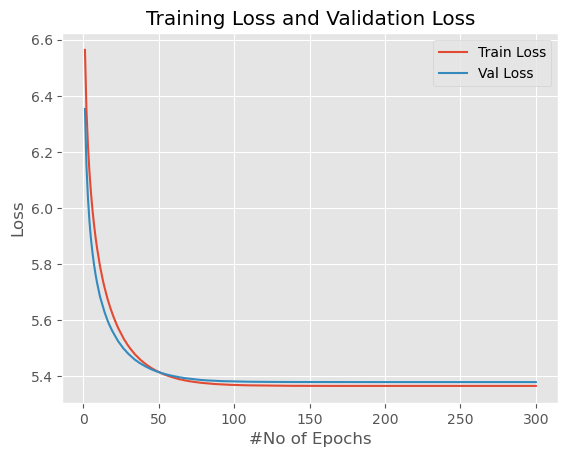

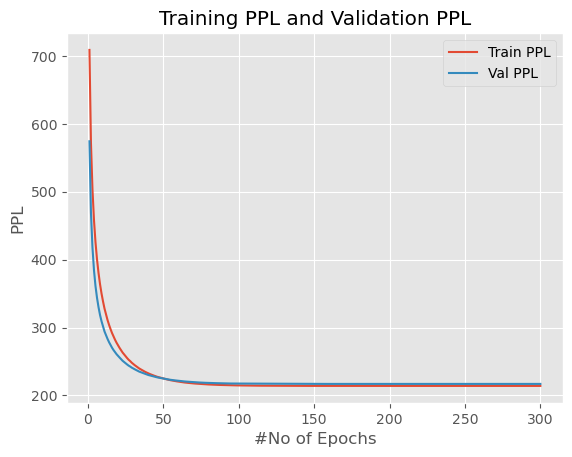

In [15]:
best_val_loss = float("inf")
epochs = 200
best_model = None
bptt = 35
train_loss_per_epoch = list()
val_loss_per_epoch = list()

for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    train(model, bptt)
    epoch_loss = evaluate(model, train_data)
    val_loss = evaluate(model, val_data)
    train_loss_per_epoch.append(epoch_loss)
    val_loss_per_epoch.append(val_loss)
    print('-' * 89)
    print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.2f} | '
          'valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
                                     val_loss, math.exp(val_loss)))
    print('-' * 89)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model

    learning_sched.step()

x_axis = list(range(1, epochs + 1))
plt.style.use("ggplot")
plt.figure()
plt.plot(x_axis, train_loss_per_epoch, label='Train Loss')
plt.plot(x_axis, val_loss_per_epoch, label='Val Loss')
plt.ylabel('Loss')
plt.xlabel("#No of Epochs")
plt.title('Training Loss and Validation Loss')
plt.legend(loc='upper right')
plt.show()
plt.style.use("ggplot")
plt.figure()
plt.plot(x_axis, np.exp(train_loss_per_epoch), label='Train PPL')
plt.plot(x_axis, np.exp(val_loss_per_epoch), label='Val PPL')
plt.ylabel('PPL')
plt.xlabel("#No of Epochs")
plt.title('Training PPL and Validation PPL')
plt.legend(loc='upper right')
plt.show()

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 5  - Generate Sentences
---
Use the following function to generate 3 sentences of length 20, and print them. Do they make sense? (you can compare generated sentences over epochs, to see if some logic is gained during training).

In [18]:
def generate(model, vocab, nwords=100, temp=1.0):
    model.eval()
    ntokens = len(vocab)
    itos = vocab.vocab.get_itos()
    model_input = torch.randint(ntokens, (1, 1), dtype=torch.long).to(device)
    words = []
    with torch.no_grad():
        for i in range(nwords):
            output = model(model_input, None)
            word_weights = output[-1].squeeze().div(temp).exp().cpu()
            word_idx = torch.multinomial(word_weights, 1)[0]
            word_tensor = torch.Tensor([[word_idx]]).long().to(device)
            model_input = torch.cat([model_input, word_tensor], 0)
            word = itos[word_idx]
            words.append(word)
    return words

In [19]:
num_sentences = 3
for i in range(num_sentences):
    sentence = generate(model, vocab, nwords=20)
    sentence_str = ' '
    print(sentence_str.join(sentence))

corpus christi tv company lost proprietor along the muzaffar street resulted in the 2013 . the large highway receptions system
through she ' s 104 in a <unk> , is called up the book . boxing howell speculated that she
shafts , adjacent to port @-@ based road on oldham road of raeburn with the late asteroid intervention . calculated


## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/